In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-subjects-70-95-years-activity-recognition/503.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/506.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/507.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/505.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/515.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/513.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/512.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/509.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/502.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/508.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/501.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/511.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/514.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/504.csv
/kaggle/input/adult-

### Count the number of rows and columns in each dataset- 

In [2]:
import numpy as np 
import pandas as pd 

#List all file paths in the '/kaggle/input' directory
lis_paths = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        lis_paths.append(os.path.join(dirname, filename))

#Initialize an empty dictionary to store data 
data = {}
#Iterate through each file path and read CSV files
for i,path in enumerate(lis_paths):
    temp = pd.read_csv(path)
    #Extract filename and use it as a key in the data dictionary
    data[path.split('/')[-1].split('.')[0]] = temp
    print(path.split('/')[-1].split('.')[0],temp.shape)

503 (116413, 8)
506 (122714, 8)
507 (120125, 8)
505 (87006, 8)
515 (153517, 8)
513 (123599, 8)
512 (119310, 8)
509 (121763, 8)
502 (131367, 8)
508 (130494, 8)
501 (103860, 8)
511 (128063, 8)
514 (101510, 8)
504 (150758, 8)
510 (122061, 8)


### Checking for null values in each dataset- 

In [3]:
for key,value in data.items():
    print(key,value.isnull().sum())

503 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
506 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
507 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
505 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
515 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
513 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
512 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
509 timestamp    0
back_x       0
back_y 

### Combining all 15 csv files- 

In [4]:
import pandas as pd
import os

directory_path = '/kaggle/input/adult-subjects-70-95-years-activity-recognition'

# Listing all CSV files in the specified directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initializing an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    current_data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, current_data], ignore_index=True)

combined_data.to_csv('/kaggle/working/combined_data.csv', index=False)
print(combined_data)

                       timestamp    back_x    back_y    back_z   thigh_x  \
0        2021-03-29 14:42:07.460 -0.971680 -0.072266 -0.175781 -1.712158   
1        2021-03-29 14:42:07.480 -1.364746  0.182861 -0.377197 -1.580322   
2        2021-03-29 14:42:07.500 -1.249512  0.182129 -0.466553 -1.052734   
3        2021-03-29 14:42:07.520 -0.841553 -0.026855 -0.445557 -0.863281   
4        2021-03-29 14:42:07.539 -0.669189 -0.068115 -0.380371 -0.720215   
...                          ...       ...       ...       ...       ...   
1832555  2021-05-07 08:58:45.009 -0.974121  0.107666 -0.255615 -1.002930   
1832556  2021-05-07 08:58:45.029 -0.958008  0.093018 -0.255615 -0.998779   
1832557  2021-05-07 08:58:45.049 -0.957764  0.076660 -0.257568 -0.967529   
1832558  2021-05-07 08:58:45.069 -0.946045  0.073730 -0.243164 -0.971680   
1832559  2021-05-07 08:58:45.090 -0.928223  0.074219 -0.238770 -0.971680   

          thigh_y   thigh_z  label  
0       -0.120117  1.502686      6  
1       -0.17

In [5]:
#Checking for null values in the combined_data dataset-
print(combined_data.isnull().sum())

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64


In [6]:
#Printing the first 5 rows of the combined dataset:
print(combined_data.head())

                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2021-03-29 14:42:07.460 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1  2021-03-29 14:42:07.480 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2  2021-03-29 14:42:07.500 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3  2021-03-29 14:42:07.520 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4  2021-03-29 14:42:07.539 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   

    thigh_z  label  
0  1.502686      6  
1 -0.145508      6  
2 -0.783691      6  
3 -0.416992      6  
4 -0.291504      6  


In [7]:
#Shape of the combined dataset:
print(combined_data.shape)

(1832560, 8)


In [8]:
#Checking duplicate values in the combined dataset:
print("Duplicate values in the combined data ----> ",combined_data.duplicated().sum())

Duplicate values in the combined data ---->  0


In [9]:
#Convert 'timestamp' column to datetime format
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

#Add a new column 'timestamp_seconds' to store the timestamp in seconds
combined_data['timestamp_seconds'] = combined_data['timestamp'].apply(lambda x: x.timestamp())

combined_data['timestamp_seconds']

0          1.617029e+09
1          1.617029e+09
2          1.617029e+09
3          1.617029e+09
4          1.617029e+09
               ...     
1832555    1.620378e+09
1832556    1.620378e+09
1832557    1.620378e+09
1832558    1.620378e+09
1832559    1.620378e+09
Name: timestamp_seconds, Length: 1832560, dtype: float64

In [10]:
#Update 'timestamp' column with values from 'timestamp_seconds'
combined_data['timestamp'] = combined_data['timestamp_seconds']
combined_data['timestamp']

0          1.617029e+09
1          1.617029e+09
2          1.617029e+09
3          1.617029e+09
4          1.617029e+09
               ...     
1832555    1.620378e+09
1832556    1.620378e+09
1832557    1.620378e+09
1832558    1.620378e+09
1832559    1.620378e+09
Name: timestamp, Length: 1832560, dtype: float64

In [11]:
print(combined_data)

            timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0        1.617029e+09 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1        1.617029e+09 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2        1.617029e+09 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3        1.617029e+09 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4        1.617029e+09 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   
...               ...       ...       ...       ...       ...       ...   
1832555  1.620378e+09 -0.974121  0.107666 -0.255615 -1.002930  0.034424   
1832556  1.620378e+09 -0.958008  0.093018 -0.255615 -0.998779  0.019043   
1832557  1.620378e+09 -0.957764  0.076660 -0.257568 -0.967529  0.021484   
1832558  1.620378e+09 -0.946045  0.073730 -0.243164 -0.971680  0.018066   
1832559  1.620378e+09 -0.928223  0.074219 -0.238770 -0.971680 -0.001221   

          thigh_z  label  timestamp_seconds  
0        1.502686      6       1.617029e+09  
1      

In [12]:
print(combined_data)

            timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0        1.617029e+09 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1        1.617029e+09 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2        1.617029e+09 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3        1.617029e+09 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4        1.617029e+09 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   
...               ...       ...       ...       ...       ...       ...   
1832555  1.620378e+09 -0.974121  0.107666 -0.255615 -1.002930  0.034424   
1832556  1.620378e+09 -0.958008  0.093018 -0.255615 -0.998779  0.019043   
1832557  1.620378e+09 -0.957764  0.076660 -0.257568 -0.967529  0.021484   
1832558  1.620378e+09 -0.946045  0.073730 -0.243164 -0.971680  0.018066   
1832559  1.620378e+09 -0.928223  0.074219 -0.238770 -0.971680 -0.001221   

          thigh_z  label  timestamp_seconds  
0        1.502686      6       1.617029e+09  
1      

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# List of file paths containing the data for each subject
file_paths = ['/kaggle/input/adult-subjects-70-95-years-activity-recognition/501.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/502.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/503.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/504.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/505.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/506.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/507.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/508.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/509.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/510.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/511.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/512.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/513.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/514.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/515.csv']

#Read data from CSV files and combine into a single DataFrame
data = {}
for path in file_paths:
    key = path.split('/')[-1].split('.')[0] 
    data[key] = pd.read_csv(path)
combined_data = pd.concat(data.values(), ignore_index=True)

#Split the combined data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=1/15, random_state=42)

#Save the training and testing data to CSV files
train_data.to_csv('/kaggle/working/train_data.csv', index=False)
test_data.to_csv('/kaggle/working/test_data.csv', index=False)
'/kaggle/working/train_data.csv', '/kaggle/working/test_data.csv'

('/kaggle/working/train_data.csv', '/kaggle/working/test_data.csv')

In [14]:
print(train_data)

                       timestamp    back_x    back_y    back_z   thigh_x  \
1040221  2021-04-26 14:34:32.580 -1.243408 -0.186279  0.139648 -1.102539   
931269   2021-04-16 15:04:25.084 -0.881836  0.100098 -0.274902 -0.944824   
796870   2021-04-15 14:58:13.340 -0.848633 -0.155762 -0.599121 -2.541016   
1266688  2021-05-07 10:30:41.124 -0.187500  0.128906  0.967285 -0.062012   
1298316  2021-05-07 10:42:12.803 -1.333496 -0.317627 -0.897705 -1.214844   
...                          ...       ...       ...       ...       ...   
259178   2021-03-29 14:50:18.920 -0.296875 -0.109375  0.875000  0.015625   
1414414  2021-05-07 16:08:05.260 -0.948730 -0.034424 -0.215820 -1.012939   
131932   2021-03-26 08:33:10.559 -0.906250  0.000000  0.343750  0.217773   
671155   2021-04-14 14:57:43.700 -0.648926  0.063965  0.281006 -0.381104   
121958   2021-03-26 08:29:23.479 -0.038574  0.133789  0.895508 -0.004150   

          thigh_y   thigh_z  label  
1040221 -0.068848 -0.087402      1  
931269  -0.08

In [15]:
print(test_data)

                       timestamp    back_x    back_y    back_z   thigh_x  \
1677181  2021-05-21 14:47:00.400 -1.000000 -0.125000 -0.312500  0.355713   
970249   2021-04-26 14:09:55.979 -0.549316  0.033691  0.750000  0.046875   
837527   2021-04-16 14:32:08.284 -0.818604  0.125000  0.545654  0.093506   
274392   2021-03-29 14:55:31.200 -0.921875 -0.062500  0.329102  0.312500   
459425   2021-04-07 10:51:30.360 -0.997559 -0.012451  0.000000 -0.981445   
...                          ...       ...       ...       ...       ...   
567631   2021-04-13 15:04:33.819 -0.968750 -0.093750  0.187500 -0.968750   
681901   2021-04-14 15:01:18.619 -1.152344  0.006836  0.111816 -1.624756   
634913   2021-04-14 14:43:44.299 -0.942383 -0.164795  0.305908 -0.864502   
910127   2021-04-16 14:57:22.245 -0.905029  0.231934 -0.481689 -1.571533   
654974   2021-04-14 14:52:20.079 -0.937256 -0.195068  0.348633 -1.516602   

          thigh_y   thigh_z  label  
1677181  0.435059 -0.852295      7  
970249   0.32

In [16]:
# Load the train_data
train_data = pd.read_csv('/kaggle/working/train_data.csv')

# Assuming 'timestamp' column is present, you can convert it to timestamp_seconds
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['timestamp_seconds'] = train_data['timestamp'].apply(lambda x: x.timestamp())

In [17]:
print(train_data)

                      timestamp    back_x    back_y    back_z   thigh_x  \
0       2021-04-26 14:34:32.580 -1.243408 -0.186279  0.139648 -1.102539   
1       2021-04-16 15:04:25.084 -0.881836  0.100098 -0.274902 -0.944824   
2       2021-04-15 14:58:13.340 -0.848633 -0.155762 -0.599121 -2.541016   
3       2021-05-07 10:30:41.124 -0.187500  0.128906  0.967285 -0.062012   
4       2021-05-07 10:42:12.803 -1.333496 -0.317627 -0.897705 -1.214844   
...                         ...       ...       ...       ...       ...   
1710384 2021-03-29 14:50:18.920 -0.296875 -0.109375  0.875000  0.015625   
1710385 2021-05-07 16:08:05.260 -0.948730 -0.034424 -0.215820 -1.012939   
1710386 2021-03-26 08:33:10.559 -0.906250  0.000000  0.343750  0.217773   
1710387 2021-04-14 14:57:43.700 -0.648926  0.063965  0.281006 -0.381104   
1710388 2021-03-26 08:29:23.479 -0.038574  0.133789  0.895508 -0.004150   

          thigh_y   thigh_z  label  timestamp_seconds  
0       -0.068848 -0.087402      1       1.

In [18]:
# Load the test_data
test_data = pd.read_csv('/kaggle/working/test_data.csv')

# Assuming 'timestamp' column is present, you can convert it to timestamp_seconds
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data['timestamp_seconds'] = test_data['timestamp'].apply(lambda x: x.timestamp())

In [19]:
print(test_data)

                     timestamp    back_x    back_y    back_z   thigh_x  \
0      2021-05-21 14:47:00.400 -1.000000 -0.125000 -0.312500  0.355713   
1      2021-04-26 14:09:55.979 -0.549316  0.033691  0.750000  0.046875   
2      2021-04-16 14:32:08.284 -0.818604  0.125000  0.545654  0.093506   
3      2021-03-29 14:55:31.200 -0.921875 -0.062500  0.329102  0.312500   
4      2021-04-07 10:51:30.360 -0.997559 -0.012451  0.000000 -0.981445   
...                        ...       ...       ...       ...       ...   
122166 2021-04-13 15:04:33.819 -0.968750 -0.093750  0.187500 -0.968750   
122167 2021-04-14 15:01:18.619 -1.152344  0.006836  0.111816 -1.624756   
122168 2021-04-14 14:43:44.299 -0.942383 -0.164795  0.305908 -0.864502   
122169 2021-04-16 14:57:22.245 -0.905029  0.231934 -0.481689 -1.571533   
122170 2021-04-14 14:52:20.079 -0.937256 -0.195068  0.348633 -1.516602   

         thigh_y   thigh_z  label  timestamp_seconds  
0       0.435059 -0.852295      7       1.621608e+09  
1

## Data Analysis- 

In [20]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [21]:
#Labels mapping to human-readable activity names
labels_dic = {1:'walking',3:"shiuffling",4:"stairs (ascending)",5:"stairs (descending)",6:"standing",7:"sitting",8:"lying"}

# Extracting keys and values from the labels dictionary
labels_key = list(labels_dic.keys()) 
labels_values = list(labels_dic.values()) 
# Count the occurrences of each label in the combined dataset
counts = []

for label,value in zip(labels_key,labels_values):
    counts.append(len(train_data[train_data['label']==label]))

# Print total counts and shape of the combined data
print("sum of counts ---> ",sum(counts),"shape of train_data ---> ",train_data.shape)
trace = go.Pie(labels=labels_values, values=counts, hoverinfo='label+percent',
               textinfo='percent', textfont_size=12)
layout = go.Layout(title='each label density in percentage (%)')
fig = go.Figure(data=[trace], layout=layout)
fig.show()

sum of counts --->  1710389 shape of train_data --->  (1710389, 9)


From the above pie chart, we can observe that the 'label' column from the dataset is not balanced. In imbalanced datasets, models may become biased towards the majority class, leading to poor performance on the minority class.
In order to balance the dataset, we use SMOTE(Synthetic Minority Oversampling) Technique.
SMOTE technique is used to address the class imbalance in the distribution of classes, where one class(usually the minority class) has significantly fewer values than the other classes.

In [25]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the train_data
train_data = pd.read_csv('/kaggle/working/train_data.csv')

# Assuming 'timestamp' column is present, you can convert it to timestamp_seconds
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['timestamp_seconds'] = train_data['timestamp'].apply(lambda x: x.timestamp())

# Define features and target variable
X_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
X_train = train_data[X_columns]
y_train = train_data['label']

# Instantiate the SMOTE object and apply it to the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a DataFrame with the resampled training data
train_data = pd.DataFrame(X_resampled, columns=X_columns)
train_data['label'] = y_resampled

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", train_data.shape)

Shape of original training data: (1710389, 6)
Shape of resampled training data: (5682425, 7)


In [30]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the train_data
train_data = pd.read_csv('/kaggle/working/train_data.csv')

# Assuming 'timestamp' column is present, you can convert it to timestamp_seconds
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['timestamp_seconds'] = train_data['timestamp'].apply(lambda x: x.timestamp())

# Define features and target variable
X_columns = ['timestamp_seconds','back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
X_train = train_data[X_columns]
y_train = train_data['label']

# Instantiate the SMOTE object and apply it to the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a DataFrame with the resampled training data
resampled_data = pd.DataFrame(X_resampled, columns=X_columns)
resampled_data['label'] = y_resampled

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", resampled_data.shape)

Shape of original training data: (1710389, 7)
Shape of resampled training data: (5682425, 8)


In [31]:
print(resampled_data)

         timestamp_seconds    back_x    back_y    back_z   thigh_x   thigh_y  \
0             1.619448e+09 -1.243408 -0.186279  0.139648 -1.102539 -0.068848   
1             1.618585e+09 -0.881836  0.100098 -0.274902 -0.944824 -0.085205   
2             1.618499e+09 -0.848633 -0.155762 -0.599121 -2.541016  0.628906   
3             1.620383e+09 -0.187500  0.128906  0.967285 -0.062012 -0.191895   
4             1.620384e+09 -1.333496 -0.317627 -0.897705 -1.214844 -0.107910   
...                    ...       ...       ...       ...       ...       ...   
5682420       1.620376e+09 -0.027100 -0.873916  0.478075  0.072510  0.998026   
5682421       1.618325e+09 -0.140449  0.062500  0.875644  0.069990  0.000000   
5682422       1.617029e+09 -0.296875 -0.108284  0.875000  0.015625 -0.031155   
5682423       1.618411e+09  0.026855 -0.021973  1.000732  0.008258  0.156250   
5682424       1.618584e+09 -0.382362  0.094727  0.921631  0.063195  0.027132   

          thigh_z  label  
0       -0.0

In [35]:
# Save the resampled data as a CSV file
resampled_data.to_csv('/kaggle/working/resampled_data.csv', index=False)

In [32]:
print(train_data)

                      timestamp    back_x    back_y    back_z   thigh_x  \
0       2021-04-26 14:34:32.580 -1.243408 -0.186279  0.139648 -1.102539   
1       2021-04-16 15:04:25.084 -0.881836  0.100098 -0.274902 -0.944824   
2       2021-04-15 14:58:13.340 -0.848633 -0.155762 -0.599121 -2.541016   
3       2021-05-07 10:30:41.124 -0.187500  0.128906  0.967285 -0.062012   
4       2021-05-07 10:42:12.803 -1.333496 -0.317627 -0.897705 -1.214844   
...                         ...       ...       ...       ...       ...   
1710384 2021-03-29 14:50:18.920 -0.296875 -0.109375  0.875000  0.015625   
1710385 2021-05-07 16:08:05.260 -0.948730 -0.034424 -0.215820 -1.012939   
1710386 2021-03-26 08:33:10.559 -0.906250  0.000000  0.343750  0.217773   
1710387 2021-04-14 14:57:43.700 -0.648926  0.063965  0.281006 -0.381104   
1710388 2021-03-26 08:29:23.479 -0.038574  0.133789  0.895508 -0.004150   

          thigh_y   thigh_z  label  timestamp_seconds  
0       -0.068848 -0.087402      1       1.

In [33]:
print(test_data)

                     timestamp    back_x    back_y    back_z   thigh_x  \
0      2021-05-21 14:47:00.400 -1.000000 -0.125000 -0.312500  0.355713   
1      2021-04-26 14:09:55.979 -0.549316  0.033691  0.750000  0.046875   
2      2021-04-16 14:32:08.284 -0.818604  0.125000  0.545654  0.093506   
3      2021-03-29 14:55:31.200 -0.921875 -0.062500  0.329102  0.312500   
4      2021-04-07 10:51:30.360 -0.997559 -0.012451  0.000000 -0.981445   
...                        ...       ...       ...       ...       ...   
122166 2021-04-13 15:04:33.819 -0.968750 -0.093750  0.187500 -0.968750   
122167 2021-04-14 15:01:18.619 -1.152344  0.006836  0.111816 -1.624756   
122168 2021-04-14 14:43:44.299 -0.942383 -0.164795  0.305908 -0.864502   
122169 2021-04-16 14:57:22.245 -0.905029  0.231934 -0.481689 -1.571533   
122170 2021-04-14 14:52:20.079 -0.937256 -0.195068  0.348633 -1.516602   

         thigh_y   thigh_z  label  timestamp_seconds  
0       0.435059 -0.852295      7       1.621608e+09  
1

In [34]:
print(combined_data)

                       timestamp    back_x    back_y    back_z   thigh_x  \
0        2021-03-24 14:42:03.839 -0.999023 -0.063477  0.140625 -0.980469   
1        2021-03-24 14:42:03.859 -0.980225 -0.079346  0.140625 -0.961182   
2        2021-03-24 14:42:03.880 -0.950195 -0.076416  0.140625 -0.949463   
3        2021-03-24 14:42:03.900 -0.954834 -0.059082  0.140381 -0.957520   
4        2021-03-24 14:42:03.920 -0.972412 -0.042969  0.142822 -0.977051   
...                          ...       ...       ...       ...       ...   
1832555  2021-05-27 10:20:12.779 -0.968018  0.005371  0.283691 -0.953369   
1832556  2021-05-27 10:20:12.800 -0.974609 -0.006348  0.284912 -0.959717   
1832557  2021-05-27 10:20:12.819 -0.959961 -0.005127  0.278564 -0.972412   
1832558  2021-05-27 10:20:12.840 -0.962402  0.000488  0.265625 -0.970215   
1832559  2021-05-27 10:20:12.859 -0.963135  0.015137  0.268066 -0.970215   

          thigh_y   thigh_z  label  
0       -0.112061 -0.048096      6  
1       -0.12

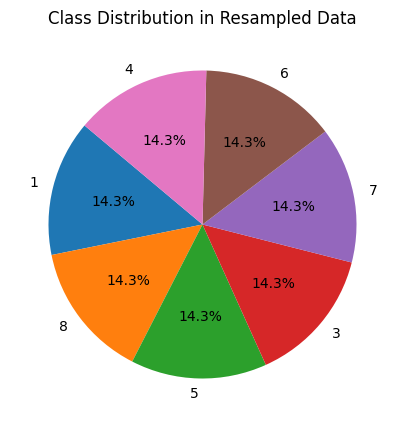

In [36]:
import matplotlib.pyplot as plt

labels = resampled_data['label'].value_counts().index
sizes = resampled_data['label'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Resampled Data')
plt.show()

In [37]:
print(resampled_data)

         timestamp_seconds    back_x    back_y    back_z   thigh_x   thigh_y  \
0             1.619448e+09 -1.243408 -0.186279  0.139648 -1.102539 -0.068848   
1             1.618585e+09 -0.881836  0.100098 -0.274902 -0.944824 -0.085205   
2             1.618499e+09 -0.848633 -0.155762 -0.599121 -2.541016  0.628906   
3             1.620383e+09 -0.187500  0.128906  0.967285 -0.062012 -0.191895   
4             1.620384e+09 -1.333496 -0.317627 -0.897705 -1.214844 -0.107910   
...                    ...       ...       ...       ...       ...       ...   
5682420       1.620376e+09 -0.027100 -0.873916  0.478075  0.072510  0.998026   
5682421       1.618325e+09 -0.140449  0.062500  0.875644  0.069990  0.000000   
5682422       1.617029e+09 -0.296875 -0.108284  0.875000  0.015625 -0.031155   
5682423       1.618411e+09  0.026855 -0.021973  1.000732  0.008258  0.156250   
5682424       1.618584e+09 -0.382362  0.094727  0.921631  0.063195  0.027132   

          thigh_z  label  
0       -0.0

In [39]:
#Resampling test data-
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the train_data
test_data = pd.read_csv('/kaggle/working/test_data.csv')

# Assuming 'timestamp' column is present, you can convert it to timestamp_seconds
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data['timestamp_seconds'] = test_data['timestamp'].apply(lambda x: x.timestamp())

# Define features and target variable
X_columns = ['timestamp_seconds','back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
X_test = test_data[X_columns]
y_test = test_data['label']

# Instantiate the SMOTE object and apply it to the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_test, y_test)

# Create a DataFrame with the resampled training data
resampledtest_data = pd.DataFrame(X_resampled, columns=X_columns)
resampledtest_data['label'] = y_resampled

print("Shape of original training data:", X_test.shape)
print("Shape of resampled training data:", resampledtest_data.shape)

Shape of original training data: (122171, 7)
Shape of resampled training data: (405405, 8)


In [40]:
print(resampledtest_data)

        timestamp_seconds    back_x    back_y    back_z   thigh_x   thigh_y  \
0            1.621608e+09 -1.000000 -0.125000 -0.312500  0.355713  0.435059   
1            1.619446e+09 -0.549316  0.033691  0.750000  0.046875  0.324951   
2            1.618584e+09 -0.818604  0.125000  0.545654  0.093506  0.078125   
3            1.617030e+09 -0.921875 -0.062500  0.329102  0.312500 -0.078125   
4            1.617793e+09 -0.997559 -0.012451  0.000000 -0.981445 -0.084717   
...                   ...       ...       ...       ...       ...       ...   
405400       1.620376e+09 -0.027588 -0.873535  0.496098  0.072510  0.994965   
405401       1.618584e+09 -0.376448  0.059353  0.921631  0.062500 -0.028772   
405402       1.618584e+09 -0.385057  0.062500  0.922119  0.067242  0.046875   
405403       1.618584e+09 -0.380913  0.062988  0.935303  0.062500 -0.013163   
405404       1.616748e+09 -0.017943  0.142098  0.890625 -0.015625 -0.263778   

         thigh_z  label  
0      -0.852295      7  

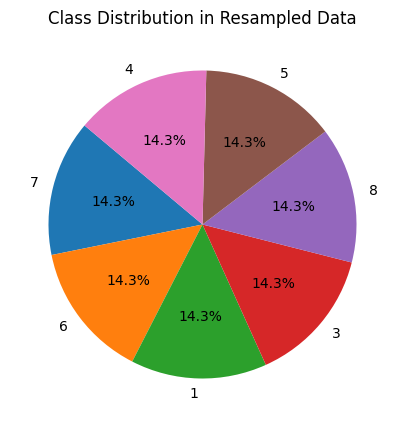

In [41]:
import matplotlib.pyplot as plt

labels = resampledtest_data['label'].value_counts().index
sizes = resampledtest_data['label'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Resampled Data')
plt.show()

In [43]:
# Save the resampled data as a CSV file
resampledtest_data.to_csv('/kaggle/working/resampledtest_data.csv', index=False)

In [46]:
print(resampledtest_data)

                      timestamp    back_x    back_y    back_z   thigh_x  \
0       2021-05-21 14:47:00.400 -1.000000 -0.125000 -0.312500  0.355713   
1       2021-04-26 14:09:55.979 -0.549316  0.033691  0.750000  0.046875   
2       2021-04-16 14:32:08.284 -0.818604  0.125000  0.545654  0.093506   
3       2021-03-29 14:55:31.200 -0.921875 -0.062500  0.329102  0.312500   
4       2021-04-07 10:51:30.360 -0.997559 -0.012451  0.000000 -0.981445   
...                         ...       ...       ...       ...       ...   
122166  2021-04-13 15:04:33.819 -0.968750 -0.093750  0.187500 -0.968750   
122167  2021-04-14 15:01:18.619 -1.152344  0.006836  0.111816 -1.624756   
122168  2021-04-14 14:43:44.299 -0.942383 -0.164795  0.305908 -0.864502   
122169  2021-04-16 14:57:22.245 -0.905029  0.231934 -0.481689 -1.571533   
122170  2021-04-14 14:52:20.079 -0.937256 -0.195068  0.348633 -1.516602   

         thigh_y   thigh_z  label  timestamp_seconds  
0       0.435059 -0.852295      7       1.62

In [48]:
# Drop 'timestamp' column from resampled_data
timestamp_column_name = 'timestamp'
if timestamp_column_name in resampled_data.columns:
    resampled_data.drop(columns=[timestamp_column_name], inplace=True)
else:
    print(f"Column '{timestamp_column_name}' not found in resampled_data.")

Column 'timestamp' not found in resampled_data.


In [50]:
# Drop 'timestamp' column from resampled_data
timestamp_column_name = 'timestamp'
if timestamp_column_name in resampledtest_data.columns:
    resampledtest_data.drop(columns=[timestamp_column_name], inplace=True)
else:
    print(f"Column '{timestamp_column_name}' not found in resampled_data.")

Column 'timestamp' not found in resampled_data.


In [51]:
print(resampled_data)

         timestamp_seconds    back_x    back_y    back_z   thigh_x   thigh_y  \
0             1.619448e+09 -1.243408 -0.186279  0.139648 -1.102539 -0.068848   
1             1.618585e+09 -0.881836  0.100098 -0.274902 -0.944824 -0.085205   
2             1.618499e+09 -0.848633 -0.155762 -0.599121 -2.541016  0.628906   
3             1.620383e+09 -0.187500  0.128906  0.967285 -0.062012 -0.191895   
4             1.620384e+09 -1.333496 -0.317627 -0.897705 -1.214844 -0.107910   
...                    ...       ...       ...       ...       ...       ...   
5682420       1.620376e+09 -0.027100 -0.873916  0.478075  0.072510  0.998026   
5682421       1.618325e+09 -0.140449  0.062500  0.875644  0.069990  0.000000   
5682422       1.617029e+09 -0.296875 -0.108284  0.875000  0.015625 -0.031155   
5682423       1.618411e+09  0.026855 -0.021973  1.000732  0.008258  0.156250   
5682424       1.618584e+09 -0.382362  0.094727  0.921631  0.063195  0.027132   

          thigh_z  label  
0       -0.0

In [52]:
print(resampledtest_data)

          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label  \
0      -1.000000 -0.125000 -0.312500  0.355713  0.435059 -0.852295      7   
1      -0.549316  0.033691  0.750000  0.046875  0.324951 -1.019043      7   
2      -0.818604  0.125000  0.545654  0.093506  0.078125 -1.077881      7   
3      -0.921875 -0.062500  0.329102  0.312500 -0.078125 -1.047607      7   
4      -0.997559 -0.012451  0.000000 -0.981445 -0.084717 -0.062744      6   
...          ...       ...       ...       ...       ...       ...    ...   
122166 -0.968750 -0.093750  0.187500 -0.968750 -0.147461 -0.034180      6   
122167 -1.152344  0.006836  0.111816 -1.624756 -0.411133  0.311768      1   
122168 -0.942383 -0.164795  0.305908 -0.864502  0.024170 -0.924805      1   
122169 -0.905029  0.231934 -0.481689 -1.571533 -0.047852  0.473389      1   
122170 -0.937256 -0.195068  0.348633 -1.516602  0.847168  0.689209      1   

        timestamp_seconds  
0            1.621608e+09  
1            1.6194

## Random Forest- 

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load train_data and test_data
resampled_data = pd.read_csv('/kaggle/working/resampled_data.csv')
resampledtest_data = pd.read_csv('/kaggle/working/resampledtest_data.csv')

# Assuming 'timestamp' column is present, convert it to timestamp_seconds
resampled_data['timestamp'] = pd.to_datetime(resampled_data['timestamp'])
resampled_data['timestamp_seconds'] = resampled_data['timestamp'].apply(lambda x: x.timestamp())

resampledtest_data['timestamp'] = pd.to_datetime(resampledtest_data['timestamp'])
resampledtest_data['timestamp_seconds'] = resampledtest_data['timestamp'].apply(lambda x: x.timestamp())

# Define features and target variable
X_columns = ['timestamp_seconds', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
X_train = resampled_data[X_columns]
y_train = resampled_data['label']

X_test = resampledtest_data[X_columns]
y_test = resampledtest_data['label']

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9593929819678975
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.96      0.97     57915
           3       0.52      0.78      0.62      3420
           4       0.74      0.87      0.80       253
           5       0.59      0.71      0.65       292
           6       0.96      0.93      0.94     22909
           7       1.00      1.00      1.00     25493
           8       1.00      1.00      1.00     11889

    accuracy                           0.96    122171
   macro avg       0.83      0.89      0.85    122171
weighted avg       0.97      0.96      0.96    122171



In [54]:
# Training accuracy
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9999992960751791


## LOSO Cross Validation Technique- 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import LeaveOneGroupOut

resampled_data = pd.read_csv('/kaggle/working/resampled_data.csv')
resampledtest_data = pd.read_csv('/kaggle/working/resampledtest_data.csv')

# resampled_data['timestamp_seconds'] = pd.to_datetime(resampled_data['timestamp']).apply(lambda x: x.timestamp())
# resampledtest_data['timestamp_seconds'] = pd.to_datetime(resampledtest_data['timestamp']).apply(lambda x: x.timestamp())

resampled_data['label'] = resampled_data['label']  
resampledtest_data['label'] = resampledtest_data['label']  

# Define features and target variable
X_columns = ['timestamp_seconds', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
X_train = resampled_data[X_columns]
y_train = resampled_data['label']

rf_classifier = RandomForestClassifier(random_state=42)

logo = LeaveOneGroupOut()

all_y_true_train = []
all_y_pred_train = []
all_y_true_test = []
all_y_pred_test = []

# Perform LOSO cross-validation
for train_index, test_index in logo.split(X_train, y_train, groups=resampled_data['label']):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model
    rf_classifier.fit(X_train_cv, y_train_cv)

    # Predict on training data
    y_pred_train = rf_classifier.predict(X_train_cv)
    all_y_true_train.extend(y_train_cv)
    all_y_pred_train.extend(y_pred_train)

    # Predict on test data
    y_pred_test = rf_classifier.predict(X_test_cv)
    all_y_true_test.extend(y_test_cv)
    all_y_pred_test.extend(y_pred_test)

# Model's performance on training data
accuracy_train = accuracy_score(all_y_true_train, all_y_pred_train)

# Model's performance on test data
accuracy_test = accuracy_score(all_y_true_test, all_y_pred_test)

print("Train Accuracy (LOSO):", accuracy_train)
print("\nTest Accuracy (LOSO):", accuracy_test)
